<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management, Analysis and Security</h1>

<h2 align='center'> Lab 04 - Data Analysis: Linear Regression & Prediction </h2>

*****

## Aim
There are three aims in this lab:
1. Outline the common terms used in data analysis and machine learning models
2. Introduce basic machine learning techniques used for numerical prediction
3. Describe the theory and rationales behind these techniques, to enable accurate and well-guided decisions when creating models

*****

## Learning Outcomes
- L03: Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- L04: Formulate and extract descriptive and predictive statistics from data
- L05: Analyse and interpret results from descriptive and predictive data analysis
- L06: Apply their knowledge to a given problem domain and articulate potential data analysis problems

***

## Preparation
<sub> This can include lectures or external videos. Take your pick</sub>


Before starting this lab, we suggest you complete the following:
- Watch the lectures this week
- Ensure you've completed and are familiar with Lab02 and Lab03 in particular


The following functions may be useful for this lab:

| Function | Description |
| ---: |:---|
| `lm.fit()` | fits and returns a linear model |
| `model.predict()` | predict Y using the linear model with estimated coefficients |
| `model.score()` | returns the coefficient of determination ( $R^2$ ) |
| `model.intercept_`  | returns estimated intercept |
| `model.coef_`  | returns estimated coefficients |
| `train_test_split()` | splits your data into training and testing sets |
| `pd.get_dummies()` | encode a categorical variable into separate columns (typically use `drop_first=True`) |

***

In [51]:
# import packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression       # linear regression
from sklearn.model_selection import train_test_split    # train-test split
from sklearn.preprocessing import OneHotEncoder         # nominal variable

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

### Exercise 1: Predicting Pounds

We're going to use a simple dataset for this exercise with 200 records of only two variables: **height** and **weight**. Let's load this dataset from its web link.

In [52]:
url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights'
df_hw = pd.read_html(url, header=0, index_col=0)[1]
df_hw.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78,112.99
2,71.52,136.49
3,69.40,153.03
4,68.22,142.34
5,67.79,144.30


#### 1.1 Simple Linear Regression
**Simple linear regression** is a method used to understand the relationship between the response variable (`y`) and the predictor (`x`), particularly where there is **only one predictor**. Thinking back to plotting straight lines, this has the form $$ y = \beta_0 + \beta_1 x $$
(Note that this is similar to $ y = mx + b $, if you've seen that equation before). $\beta_0$ is the coefficient that denotes the **intercept** (i.e. the value we expect `y` to be when `x`=0), and $\beta_1$ denotes the **slope with respect to `x`** (i.e. the amount we expect `y` to increase if `x` increases by 1).

If you haven't seen this before, it can be confusing. We'll guide you through this exercise to help you understand it. Given the dataset above, we want to see if there's a relationship between height and weight - and, most importantly, we want to understand this relationship as much as possible. We'll use Scikit-learn (`sklearn`)'s Linear Regression package to do it for us. Please check the formal documentation for Linear Regression module provided by (`sklearn`) <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html"> here</a>.

First, let's **assign the columns** to `x` and `y`. Remember, we want to predict the weight (response) using the height (predictor).

In [53]:
# assign the predictor to x
x = df_hw["Height(Inches)"]

# assign the response to y
y = df_hw["Weight(Pounds)"]

Now let's call the `LinearRegression` module (make sure you run the imports code block at the start).

In [54]:
# create a LinearRegression instance
lr = LinearRegression()

# fit the data using linear regression
# the reshaping is because the function expects more columns in x
model = lr.fit(np.array(x).reshape(-1,1),y)

# now let's see the coefficients
print("The intercept of this model is:", model.intercept_)
print("The slope coefficient of this model is:", model.coef_[0])
print("")
print("Thus the equation is: Weight =", model.intercept_.round(2), "+", model.coef_[0].round(2), "* Height")

The intercept of this model is: -106.02770644878126
The slope coefficient of this model is: 3.432676129271628

Thus the equation is: Weight = -106.03 + 3.43 * Height


We can see the relationship as an equation now! It's interesting that the intercept is -106.03 (which indicates that when Height is very small then Weight is negative, which would be impossible), but that's just because our data has a very limited range.

As great as an equation is, it'd be better if we could understand it visually. Let's plot the points and add the regression line.

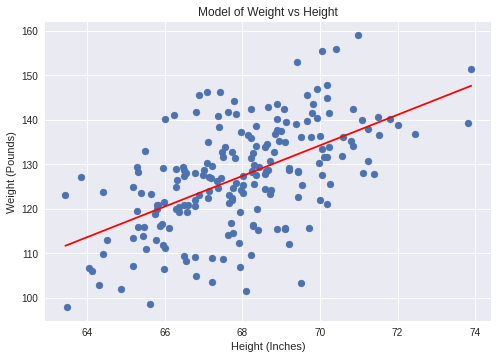

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)

# scatter the points
plt.scatter(x,y)

# add the regression line
b0 = model.intercept_
b1 = model.coef_[0]
x_range = [x.min(), x.max()]                      # get the bounds for x
y_range = [b0+b1*x_range[0], b0+b1*x_range[1]]    # get the bounds for y
plt.plot(x_range, y_range, c="red")

# add some labels and titles
ax.set_xlabel("Height (Inches)")
ax.set_ylabel("Weight (Pounds)")
ax.set_title("Model of Weight vs Height")

plt.show()

How's that? We can see a clear relationship between height and weight, and we also know the exact equation of the relationship. Now let's see how accurately it fit the data.

In [56]:
model.score(np.array(df_hw["Height(Inches)"]).reshape(-1,1), df_hw["Weight(Pounds)"])

0.31009833265482667

The output of that function is the $ R^2 $, or **R-squared** score. It ranges from 0 to 1 (although some very bad models can have negative scores), and the higher the score the better. The score penalises predictions that are far away from the actual value (where the vertical distance between the prediction and the actual point is called the **residual**).

The score above isn't great, because there's so much variation - that is, for the same height, there are many different weights. Because of this, keep in mind that the $R^2$ score is **relative**, and changes depending on the data you're working with.

Suppose you know someone who's **70 inches** (178cm) tall, but you don't know their weight (and you'd guess they have an "average" build). Using the equation we found, estimate their weight.

In [57]:
# TODO: your answer here
print("Weight is predicted to be", np.round(-106.03 + 3.43 * 70, 2), "pounds")

Weight is predicted to be 134.07 pounds


Now suppose you know a toddler who's **30 inches** (76cm) tall. Using the equation again, estimate their weight.

In [58]:
# TODO: your answer here
print("Weight is predicted to be", np.round(-106.03 + 3.43 * 30, 2), "pounds")

Weight is predicted to be -3.13 pounds


Did you get a weird answer? *Hint: you should have.* How come? If you're not sure why, discuss with your classmates or tutor.

Weird answer is because this data is only fit to people who are between 63 and 74 inches tall - predicting for values well outside this range would be assuming that the data follows the same linear trend overall (which is certainly not true for weight vs height).

### Exercise 2: Huts, Homes & Houses
Let's look at a sample of a <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data">dataset from Kaggle</a> on the sale price of a house based on a variety of other metrics. We'll try to **predict the sale price** using regression techniques.

Here are the descriptions of the columns. We won't necessarily be using all of them (although you'll have a chance to pick and choose in the extension section of this lab), but it's useful to know what you're working with.

| Name           | Description |
| ---:           | :---        |
| `LotArea`      | size of lot in square feet |
| `OverallQual`  | rating of the overall material and finish of the house (higher is better) |
| `OverallCond`  | rating of the current condition of the house (higher is better) |
| `YearBuilt`    | original construction date |
| `YearRemodAdd` | date that the last remodelling was done (=`YearBuilt` if no remodelling)
| `GrLivArea`    | above-ground living area in square feet |
| `FullBath`     | number of above-ground, full-sized bathrooms |
| `BedroomAbvGr` | number of above-ground bedrooms |
| `KitchenAbvGr` | number of above-ground kitchens |
| `GarageArea`   | size of garage in square feet |
| `YrSold`       | year that the lot was sold |
| `LotShape`     | general shape of property<br>(`Reg`=Regular, `IR1`=Slightly irregular, `IR2`=Moderately irregular, `IR3`=Very irregular)
| `LotConfig`    | configuration of lot<br>(`Inside`, `Corner`, `CulDSac`=Cul-de-sac lot, `FR2`=Frontage on 2 sides, `FR3`=Frontage on 3 sides)
| `SalePrice`    | property's sale price in dollars |

Let's import and have a look at our data.

In [59]:
# import data
houses = pd.read_csv("./data/houses_sub.csv", index_col=0)

# always nice to look at columns and summary info
print(houses.columns)
houses.describe()

# notice that LotShape and LotConfig do not show in the describe() table
# this is because they are categorical variables, not numerical

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea',
       'YrSold', 'LotShape', 'LotConfig', 'SalePrice'],
      dtype='object')


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,GarageArea,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1971.267808,1984.865753,1515.463699,1.565068,2.866438,1.046575,472.980137,2007.815753,180921.195890
std,9981.264932,1.382997,1.112799,30.202904,20.645407,525.480383,0.550916,0.815778,0.220338,213.804841,1.328095,79442.502883
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,7553.500000,5.000000,5.000000,1954.000000,1967.000000,1129.500000,1.000000,2.000000,1.000000,334.500000,2007.000000,129975.000000
50%,9478.500000,6.000000,5.000000,1973.000000,1994.000000,1464.000000,2.000000,3.000000,1.000000,480.000000,2008.000000,163000.000000
75%,11601.500000,7.000000,6.000000,2000.000000,2004.000000,1776.750000,2.000000,3.000000,1.000000,576.000000,2009.000000,214000.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5642.000000,3.000000,8.000000,3.000000,1418.000000,2010.000000,755000.000000


#### 2.1 Understanding the experiment and data

Before diving into the data, we should understand the nature of the data - not only because it will help you perform better analysis and reach more accurate conclusions, but also for reasons that will become clear during the Ethics section of this course. Answer the discussion questions below.

An **independent variable** (also called a predictor, explanatory variable, feature, or simply `X`) is an element that we use to predict the **dependent variable** (response, explained variable, target, or simply `Y`) - these terms are used interchangably with their synonyms so be prepared to see any of these in future lectures, labs and assessment.

**Identify the response** for this dataset. To make things interesting, also **guess which predictors would be best for predicting the response**.

### TODO: your answer here
Response: SalePrice
Best predictors: LotArea, YearBuilt, BedroomAbvGr (no correct answer here)

To help you understand the data, plot a **histogram of the sales price**. Then plot a **side-by-side boxplot of price based on the year the house was built**. To reduce the number of boxplots, group all houses before 1920 in one category, houses in 1921-1950 in another category, and then group by decades after that (1951-1960, 1961-1970, ...) - or if you're feeling adventurous, you can choose another grouping. What do you notice?

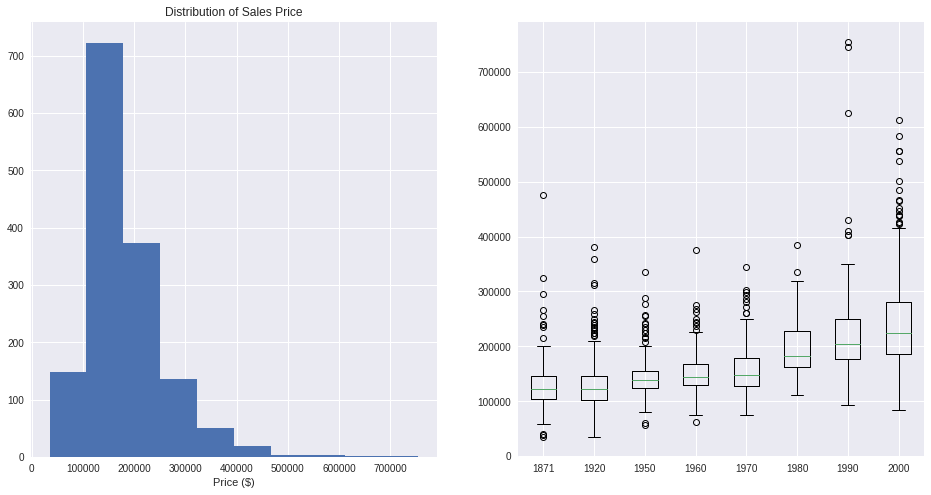

In [60]:
# TODO: your answer here
fig = plt.figure(figsize=(16,8))

# histogram
ax1 = fig.add_subplot(121)
ax1.hist(houses["SalePrice"])
ax1.set_title("Distribution of Sales Price")
ax1.set_xlabel("Price ($)")

# side-by-side boxplot
ax2 = fig.add_subplot(122)
yr_built = houses["YearBuilt"]
year_bound = [np.min(yr_built)-1, 1920, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
ax2.boxplot([houses["SalePrice"][yr_built>year_bound[i]][yr_built<=year_bound[i+1]] for i,yr in enumerate(year_bound[:-1])])
ax2.set_xticklabels([str(year) for year in year_bound[:-1]])

plt.show()

We encourage you to do some more exploratory data analysis. If you haven't already done so, you should use the Pandas `unique()` function for the categorical variables (check the formal documentation to learn about it: https://pandas.pydata.org/docs/reference/api/pandas.unique.html).

In [61]:
# TODO: your answer here (if needed)
print(houses["LotShape"].unique())
print(houses["LotConfig"].unique())

['Reg' 'IR1' 'IR2' 'IR3']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


#### 2.2 Simple linear regression - your turn

We've done simple linear regression (SLR) already, but now we want you to do it by yourself. You can use the example we gave above as a template if you wish.

Create a **simple linear regression model** of **sale price** based on **lot area**. Report the coefficients (intercept and slope) of your model and interpret what they mean.

In [62]:
x = houses["LotArea"]
y = houses["SalePrice"]

# create a LinearRegression instance
lr = LinearRegression()

# fit the data using linear regression
# the reshaping is because the function expects more columns in x
model = lr.fit(np.array(x).reshape(-1,1),y)

# now let's see the coefficients
print("The intercept of this model is:", model.intercept_)
print("The slope coefficient of this model is:", model.coef_[0])
print("")
print("Thus the equation is: SalePrice =", model.intercept_.round(2), "+", model.coef_[0].round(2), "* LotArea")

The intercept of this model is: 158836.15189687657
The slope coefficient of this model is: 2.0999719517076754

Thus the equation is: SalePrice = 158836.15 + 2.1 * LotArea


For every incremental increase in square feet of lot area, the sales price increases by $2.10 on average. The intercept also indicates a lower bound on the mean price of a house, regardless of lot area.

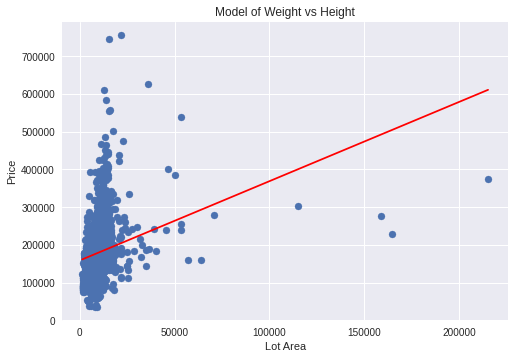

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)

# scatter the points
plt.scatter(x,y)

# add the regression line
b0 = model.intercept_
b1 = model.coef_[0]
x_range = [x.min(), x.max()]                      # get the bounds for x
y_range = [b0+b1*x_range[0], b0+b1*x_range[1]]    # get the bounds for y
plt.plot(x_range, y_range, c="red")

# add some labels and titles
ax.set_xlabel("Lot Area")
ax.set_ylabel("Price")
ax.set_title("Model of Weight vs Height")

plt.show()

You want to sell your home, which has a lot area of 36,000 square feet. Based only on your model above, what do you expect your house will sell for? First use the equation directly, then let sklearn's `model.predict()` function estimate it for you. *Hint: you should get the same answer.*

In [64]:
# TODO: your answer here
print("Sale Price is predicted to be  $", 158836.15 + 2.1*36000)
print("sklearn predicts sale price of $", model.predict(np.array([36000]).reshape(-1,1))[0].round(2))

Sale Price is predicted to be  $ 234436.15
sklearn predicts sale price of $ 234435.14


#### 2.3 Not So Simple Anymore

Now that you know how to create an SLR model, can you extend it to a Multiple Linear Regression (MLR) model? This time, assign a list of variables to `x` (still only one column for `y`), and the output of `model.coef_` will have slope coefficients in the same order as the variables in `x`.

Create a **multiple linear regression model** with **sales price** dependent on **lot area** and **year built**. Report the coefficients and compare this to the first model.

In [65]:
# TODO: your answer here
X = houses.loc[:,["LotArea","YearBuilt"]]
y = houses["SalePrice"]

# create a LinearRegression instance
lr = LinearRegression()

# fit the data using linear regression
# the reshaping is because the function expects more columns in x
model = lr.fit(X,y)

# now let's see the coefficients
print("The intercept of this model is:", model.intercept_)
print("The slope coefficient of this model is:", model.coef_)
print("")
print("Thus the equation is: SalePrice =", model.intercept_.round(2), "+", 
      " + ".join([" ".join([str(coef.round(2)),"*",X.columns[i]]) for i,coef in enumerate(model.coef_)]))

The intercept of this model is: -2532856.024570322
The slope coefficient of this model is: [   2.04117215 1365.77615312]

Thus the equation is: SalePrice = -2532856.02 + 2.04 * LotArea + 1365.78 * YearBuilt


LotArea coefficient is similar but not the same (slight codependence). Also, the intercept has changed drastically.

You might have noticed that the coefficient for `LotArea` is different to your SLR model. This is because the coefficients are dependent on the existence of other variables in the model. As you add or remove or swap variables, these coefficients will change - especially if the variables are **codependent** (i.e. not independent; a change in one variable is likely to cause a change in the other). Because of this, it can be harder to interpret each coefficient, and to do so would require "holding all other variables constant" (which is unrealistic).

#### 2.4 Evaluate Your Model on a Test Set

Before, we asked you to estimate your house price by using a SLR and a MLR, and you have seen - but how do you know how accurate that estimates are?

Let's introduce the concept of a **train-test split**. The name gives it away: you split your data into a **training set** and a **testing set** (usually 80% or 90% training); **build your model** using only the training set, and **test your model** using the testing set.

As an analogy, imagine your model is a student. Of course, you want to teach your student how to solve problems, but you also want to test its performance at some point. If you show the student the test (and the solutions) before you test them, that defeats the purpose - you're not gauging their performance, only their ability to memorise the solutions. That's why you hide the test while they learn, and then *Pop Quiz!* test their abilities.

Let's use the same dataset, but this time we'll split it into two sets, with 80% of the datapoints for training and the other 20% for testing. You can do this using Scikit-learn's `train_test_split()` function.

In [74]:
# train-test split
train, test = train_test_split(houses, test_size=0.2)
# make sure you've split it correctly
train.shape, test.shape

((1168, 14), (292, 14))

Now train the same SLR model (**sales price** dependent on **lot area**) and MLR model (**sales price** dependent on **lot area** and **year built**) on the train split.

In [87]:
# TODO: train model
x_train_SLR = np.array(train["LotArea"]).reshape(-1,1)
x_train_MLR = np.array(train.loc[:,["LotArea","YearBuilt"]])
y_train = train["SalePrice"]

# fit model
lr_SLR = LinearRegression()
lr_MLR = LinearRegression()

model_SLR = lr_SLR.fit(x_train_SLR, y_train)
model_MLR = lr_MLR.fit(x_train_MLR, y_train)

Then, using the `score()` function, test the models' performance on the testing data (`test`). You will (likely, depending on the split of the data) notice that the **the MLR testing score is higher than the SLR testing score**. Why would this be the case?

In [90]:
# TODO: check the test score and training score of your models
x_test_SLR = np.array(test["LotArea"]).reshape(-1,1)
x_test_MLR = np.array(test.loc[:,["LotArea","YearBuilt"]])

y_test = test["SalePrice"]
print("SLR Test Score: ", model_SLR.score(x_test_SLR, y_test))
print("MLR Test Score: ", model_MLR.score(x_test_MLR, y_test))

SLR Test Score:  0.08515086564369412
MLR Test Score:  0.37912015869882454


### Exercise 3: Playing With Variables
Sometimes your variables are useful as predictors, but not quite in the form you have them. You may need to apply some changes to the variable - particularly by **transforming** the variable by taking its square or **recoding** an ordinal variable to have a numerical value.

#### 3.1 Believe In A Higher Power
The relationship between a predictor and the target may not be linear, but instead have a upwards-curving relationship. For example, if we try to predict the volume of a tree trunk (which is usually cylindrical) with its radius and height, we would get a more accurate prediction by using squared radius.

To illustrate this, plot the relationship between `SalePrice` and `OverallQual` in a scatterplot. Include a line showing the relationship of the means of `SalePrice` for each level of `OverallQual`.

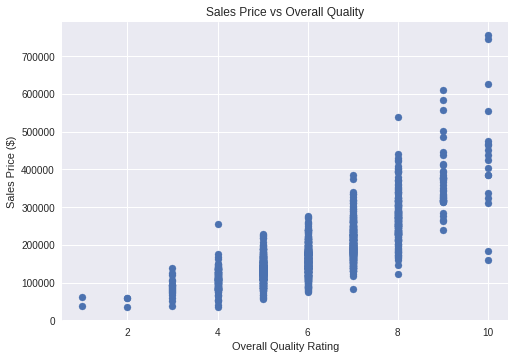

In [16]:
# TODO: plot SalePrice against OverallQual
plt.scatter(houses["OverallQual"], houses["SalePrice"])
plt.title("Sales Price vs Overall Quality")
plt.ylabel("Sales Price ($)")
plt.xlabel("Overall Quality Rating")
plt.show()

You'll notice that this has a slightly curved relationship. To take advantage of this, split the data into training and testing sets, and create two models:
 - a **simple linear regression** model 
 - a **multiple linear regression** model

Remember, you can use `np.square()` on a Pandas Series object to take the square of the column. **Find the testing score** for each model and compare them. Which one gets the higher score?

In [91]:
# TODO: split data, create and compare the two models
train, test = train_test_split(houses, test_size=0.2)
train.shape, test.shape    # check the shapes to make sure we got it right

((1168, 14), (292, 14))

In [92]:
# set x and y for training
x_train = np.array(train["OverallQual"]).reshape(-1,1)
x_train2 = np.array([train["OverallQual"], np.square(train["OverallQual"])]).T
y_train = train["SalePrice"]

# set x and y for testing
x_test = np.array(test["OverallQual"]).reshape(-1,1)
x_test2 = np.array([test["OverallQual"], np.square(test["OverallQual"])]).T
y_test = test["SalePrice"]

# fit and score the simple linear regression model
lr1 = LinearRegression()
model1 = lr1.fit(x_train, y_train)
print("SLR Test Score:", model1.score(x_test, y_test))

# fit and score the multiple linear regression model
lr2 = LinearRegression()
model2 = lr2.fit(x_train2, y_train)
print("MLR Test Score:", model2.score(x_test2, y_test))

SLR Test Score: 0.6355048594421405
MLR Test Score: 0.7137532465378682


The MLR score is higher, as it more accurately fits the curved relationship.

Generally, if we include the squared variable ($\text{OverallQual}^2$), then we should also include the original variable ($\text{OverallQual}$). Thinking back to the form of a parabola, this is to account for shifts in the curve in the `x`-direction.

#### 3.2 Categorical Variables
Sometimes we deal with categorical variables, which can be difficult to use for predicting. After all, using the form $Y = \beta_0 + \beta_1 X_1$ doesn't work if $X_1$ isn't a numerical variable. So what can we do?

We have two scenarios:
- The variable is a **nominal** variable (such as Gender, Occupation or Suburb), where there is no ordering between the values. In this case, we'll use a **One-Hot Encoder**, where we create `K-1` new columns where each of these columns (2, ..., `K`) represent a value that the variable can take. Then, each of these columns can be either 0 or 1. Note that `k=1` is dropped because it's redundant (if all other columns are 0, then the first must be 1).
- The variable is an **ordinal** variable (such as Rating, Shirt Size or in certain cases Weekday), where there is a natural ordering. This can simply be encoded into a single column based on this ordering - we'll explore this more in the next section.

Let's first look at a nominal variable, `LotConfig`. To start, create a side-by-side boxplot with `SalePrice` against each of the values of `LotConfig`.

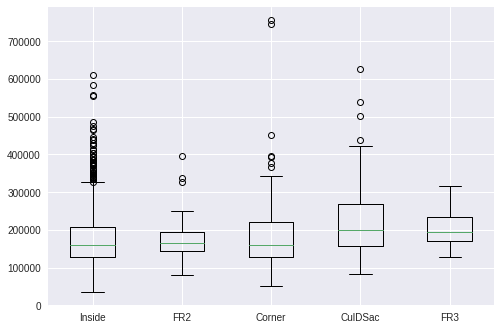

In [19]:
# TODO: side-by-side boxplot for each unique value of LotConfig
plt.boxplot([houses["SalePrice"][houses["LotConfig"]==category] 
             for category in houses["LotConfig"].unique()])
plt.xticks(list(range(1,len(houses["LotConfig"].unique())+1)), houses["LotConfig"].unique())
plt.show()

Because this is a new concept, we'll do the code for you. Go through it and understand what each line does.

In [20]:
# we'll do the encoding for you today
X = houses["LotConfig"]
enc_X = pd.get_dummies(X, drop_first=True)             # create K-1 new columns, ignore the first level
dropped_level = np.sort(houses["LotConfig"].unique())[0]

# fitting the regression
y = houses["SalePrice"]
lr = LinearRegression()
model = lr.fit(enc_X, y)                               # same as before, using an encoded variable

# outputting the results
categories = enc_X.columns
print("Intercept is", int(model.intercept_))
print("Coefficient for", dropped_level, "is 0 (because we dropped the first dummy level)")
for i, coef in enumerate(model.coef_):
    print("Coefficient for", categories[i], "is", int(coef))

Intercept is 181623
Coefficient for Corner is 0 (because we dropped the first dummy level)
Coefficient for CulDSac is 42231
Coefficient for FR2 is -3688
Coefficient for FR3 is 26851
Coefficient for Inside is -4685


Suppose $I_k$ is an **indicator variable** for category $k$ (for simplicity we'll use 1-indexed coding, eg. for $k$=2, category is `CulDSac`). 

Using the output above, what are the values of each $\beta$? Then interpret the meaning of each $\beta$.
*Hint: think about what the value of $I_k$ would be, and what that means for the corresponding $\beta_k$.*

### TODO: identify value for each beta
for I_1=Corner, I_2=CulDSac, I_3=FR2, I_4=FR3, I_5=Inside
beta_0 = 181,623: mean value for the reference level (Corner)
beta_1 = 0:       Corner is reference level, so intercept already covers it
beta_2 = 42,231:  CulDSac's mean value is beta_0 + beta_2 = 223,854
beta_3 = -3,688:  FR2's mean value is 177,935
beta_4 = 26,851:  FR3's mean value is 208,474
beta_5 = -4,685:  Inside's mean value is 176,938

Suppose you only know that a house has frontage on two sides of the property (that is, it belongs to category `FR2`). Using the model, **what would the predicted sales price be**? First use the equation directly, then use the `model.predict()` function to calculate it for you.

### TODO: calculate sales price estimate for category FR2
All I_k except FR2 (I_3) is 0, so using the equation,
    Y = 181623 + 0 + 0 - 3688 + 0 + 0 = 177935
We see that this is equivalent to the mean value found above.

In [21]:
# TODO: use model.predict()
new = pd.DataFrame(columns=["CulDSac", "FR2", "FR3", "Inside"])
new.loc[0] = [0, 1, 0, 0]    # adjust this to show FR2=1
model.predict(new)

array([177934.57446809])

Of course, we're using very little information here - you can't reliably estimate the sales price of a house purely on its lot configuration. In future assessment, be prepared to use an **encoding of a nominal variable along with numerical variables** to create a model. This is similar to what you've done for multiple linear regression, but you should keep in mind that the encoded variable (`enc_X` here) actually has $K$ columns, rather than a single column.

#### 3.3 Recoding an Ordinal Variable
What if we have an ordering in our variable? Of course, we can ignore this ordering and treat it like we would a nominal variable, but then we would lose the information that we have - and it's also unnecessary work for us.

For this course, we'll recode an ordinal variable as consecutive integers, usually with the lowest value in the order as `0` or `1` (depending on whether the lowest value is similar to a null value). Here, we'll use `LotShape` for our recoding.

Previously, we've given you clear directions on what you can do to understand a variable. Now, we'll let you do it yourself.

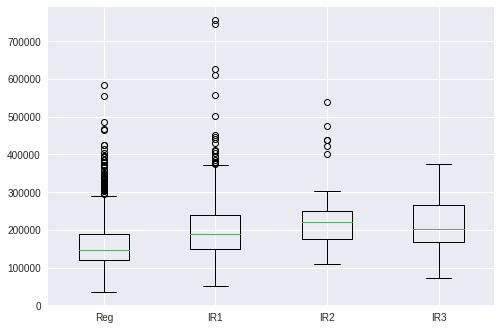

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


In [22]:
# TODO: explore the variable with relation to SalePrice
plt.boxplot([houses["SalePrice"][houses["LotShape"]==category] 
             for category in houses["LotShape"].unique()])
plt.xticks(list(range(1,len(houses["LotShape"].unique())+1)), houses["LotShape"].unique())
plt.show()

print(houses["LotShape"].value_counts())

Now **recode** the variable with respect to the irregularity of the lot shape, with `Reg`=0, `IR1`=1, `IR2`=2 and `IR3`=3.

In [23]:
# TODO: recode LotShape to be numeric
# we can use factorize to do this easily
houses["LotShapeRecode"] = pd.factorize(houses["LotShape"])[0]
houses["LotShapeRecode"].value_counts()    # compare to previous value counts

0    925
1    484
2     41
3     10
Name: LotShapeRecode, dtype: int64

Now that it's a numerical variable, we just need to fit a model. Fit a **simple linear regression** with `SalePrice` as the target and the recoding of `LotShape` as the predictor.

In [24]:
# TODO: fit regression model
train, test = train_test_split(houses, test_size = 0.2)
print("Shapes:", train.shape, test.shape)

x_train = np.array(train["LotShapeRecode"]).reshape(-1,1)
y_train = train["SalePrice"]
x_test = np.array(test["LotShapeRecode"]).reshape(-1,1)
y_test = test["SalePrice"]

lr = LinearRegression()
model = lr.fit(x_train, y_train)
print("Train Score:", model.score(x_train, y_train))
print("Test Score: ", model.score(x_test, y_test))

Shapes: (1168, 15) (292, 15)
Train Score: 0.06434832755900799
Test Score:  0.09667636343246544


(This is actually a very inaccurate model - an R^2 of less than 0.1 is almost as useless as a model that predicts purely on the mean. But this is simply because LotShape is not a great predictor for SalePrice)

#### 4.4 Time to combine everything together.
While we've covered all the topics, we haven't actually put it all together yet. In this section, we would like you to **create a train-test split**, **encode `LotConfig` using the one-hot encoder**, **recode `LotShape` as a numerical variable**, **fit a MLR model using at least 4 columns, plus `LotShape` and `LotConfig`**, and **report the test score** of the model.

This question likely requires concatenation, slicing and dropping of Pandas DataFrames, so make sure you're familiar with those topics as well. We've set a random seed so that you can compare answers with classmates and the solutions once they're released.

We expect this question will be **very difficult**, but if you're able to complete it successfully then we believe you've mastered both Lab02 and Lab04 (this lab).

In [126]:
# re-import data so we start fresh
houses = pd.read_csv("data/houses_sub.csv")

In [127]:
np.random.seed(2420)

# reconfiguring the non-numeric columns
lotconfig = pd.get_dummies(houses["LotConfig"], drop_first=True)
lotshape = pd.Series(pd.factorize(houses["LotShape"])[0])

# dropping the non-configured and appending the configured columns
houses2 = houses.copy()
houses2.drop(["LotShape","LotConfig"], axis=1, inplace=True)
houses2 = pd.concat([houses2, lotconfig, lotshape], axis=1)

# split the data into training and testing
train, test = train_test_split(houses2, test_size=0.2)
x_train = train.drop("SalePrice", axis=1)
y_train = train["SalePrice"]
x_test = test.drop("SalePrice", axis=1)
y_test = test["SalePrice"]

# fit and score the model
lr = LinearRegression()
model = lr.fit(x_train, y_train)
print("Test Score:", model.score(x_test, y_test))

Test Score: 0.6986643473561756


Congratulations, that's everything you need to know about regression! To summarise, we've covered:
- train/test split, to ensure our model is accurate and reliable
- simple linear regression (SLR), with one predictor 
- multiple linear regression (MLR), with more than one predictor 
- squared transformations of variables 
- categorical variables as predictors:
    - nominal (unordered) variables
    - ordinal (ordered) variables, with sensible recoding to numerical values
- build a model with numerical, nominal, and ordinal variables
    
While we've covered a few different topics, we certainly haven't explored all the uses of regression; there are many STAT courses that focus solely on regression analysis, but we don't have the time to cover all that content here. If you're interested in learning more, we suggest that you do some research to expand your horizons!

*****

## Homework & Extension Questions: Overfitting 
In Q3.1 we see that when we add a higher order term to the model, the test performance of the model increases - but what if we keep adding higher order term? Will the test performance keep improving?

Let's try to explore the relationship between test performance and order of **LotArea**.
(**hint:** *polynomial features:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html*)

what you need to do:
- apply z-score normalisation to **LotArea** to aviod the value become too large (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- record the train and test performances of the models starting from the SLR model (**SalePrice**=$b_0+b_1 * LotArea$) to the model with **LotArea** to the **power of 5** (**SalePrice**=$b_0+b_1 *LotArea+ ... + b_5 * LotArea^5$)
- plot the train and test performances vs the number of order
- explain what you see in the plot, is it expected?
- explain which order you should use and why

In [249]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

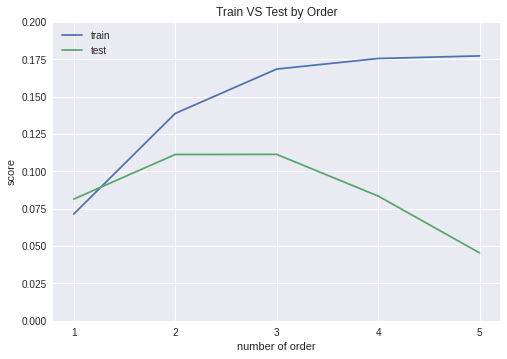

In [251]:
all_train = []
all_test = []
scaler = StandardScaler()

for fold in range(500): # run 500 times to ensure the results are stable
    train_scores = []
    test_scores = []
    for order in range(1,6):
        train, test = train_test_split(houses, test_size=0.2)
        poly = PolynomialFeatures(order)
        x_train = scaler.fit_transform(np.array(train["LotArea"]).reshape(-1,1))
        x_train = poly.fit_transform(x_train)[:,1:]
        y_train = train["SalePrice"]

        # fit model
        lr = LinearRegression()
        model = lr.fit(x_train, y_train)
        x_test = scaler.fit_transform(np.array(test["LotArea"]).reshape(-1,1))
        x_test = poly.fit_transform(x_test)[:,1:]
        y_test = test["SalePrice"]
        train_scores.append(model.score(x_train, y_train))
        test_scores.append(model.score(x_test, y_test))
    all_train.append(train_scores)
    all_test.append(test_scores)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot([i for i in range(1,6)], np.average(np.array(all_train),0), label='train')
plt.plot([i for i in range(1,6)], np.average(np.array(all_test),0), label='test')
plt.legend()
ax.set_xlabel('number of order')
ax.set_xticks([i for i in range(1,6)])
ax.set_ylabel('score')
ax.set_title("Train VS Test by Order")
ax.set_ylim([0,0.2])

plt.show()

Along with the increase of the order, the train performance also increases, but after the 3rd order, the test performance starts to drop. This is where overfitting comes in and this is expected. Therefore, we should use **SalePrice**=$b_0+b_1 *LotArea+ b_2 *LotArea^2 + b_3 * LotArea^3$.

*****